# Evaluación del Método MICE con SVR en la Librería scikit-learn

En este análisis, utilizaremos el método de imputación MICE (Multiple Imputation by Chained Equations) de la librería `sklearn`, empleando **Support Vector Regression (SVR)** como estimador, que ha demostrado ofrecer los mejores resultados en nuestro análisis previo.

## 1. Preparación de los Datos

Primero, eliminamos todos los datos nulos del DataFrame original. Posteriormente, transformaremos un 10% de los valores aleatorios en nulos, simulando un escenario realista donde los datos faltan.

## 2. Imputación de Valores Faltantes

Aplicaremos el método de imputación MICE para predecir y rellenar los valores faltantes generados en el paso anterior. La calidad de estas imputaciones será evaluada comparando los valores imputados con los originales.

## 3. Comparación de Resultados

Finalmente, evaluaremos el rendimiento del método de imputación utilizando métricas como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²).

---

A continuación, implementaremos este proceso en código.

In [27]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv(filepath_or_buffer='estaciones_meteorol.csv', sep=',')
df_resistencia_completo= df[df['NAME']=='RESISTENCIA AERO, AR' ].copy()

df_resistencia=df_resistencia_completo.drop(columns=['PRCP','DATE','NAME','Unnamed: 0'])
df_resistencia=df_resistencia.dropna()

In [ ]:
# Paso 1: Eliminar el 10% de los datos aleatoriamente
def remove_random_data(df, porcentaje=0.1):
    df_with_nan = df.copy()
    for col in df.columns:
        num_to_remove = int(len(df) * porcentaje)
        indices_to_remove = np.random.choice(df.index, size=num_to_remove, replace=False)
        df_with_nan.loc[indices_to_remove, col] = np.nan
    return df_with_nan

# Aplicar la función para eliminar el 10% de los datos
df_with_nan = remove_random_data(df_resistencia, porcentaje=0.1)

# Paso 2: Imputar los valores faltantes usando MICE
mice_imputer = IterativeImputer(estimator=SVR(),max_iter=50)

# Ajustar el imputador en el DataFrame con NaN
df_imputed = mice_imputer.fit_transform(df_with_nan)

# Convertir a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_resistencia.columns)

# Filtrar solo los valores imputados donde había NaN en el original
original_values = df_resistencia.values.flatten()[df_with_nan.isnull().values.flatten()]
imputed_values = df_imputed.values.flatten()[df_with_nan.isnull().values.flatten()]

In [30]:
# Calcular MSE, MAE y R²
mse = mean_squared_error(original_values, imputed_values)
mae = mean_absolute_error(original_values, imputed_values)
r2 = r2_score(original_values, imputed_values)

# Mostrar las métricas
print(f"\nError Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")


Error Cuadrático Medio (MSE): 4.957745766303921
Error Absoluto Medio (MAE): 1.4683600143001472
Coeficiente de Determinación (R²): 0.9174026422265106


Entrenamos al dataset completo y luego graficamos.

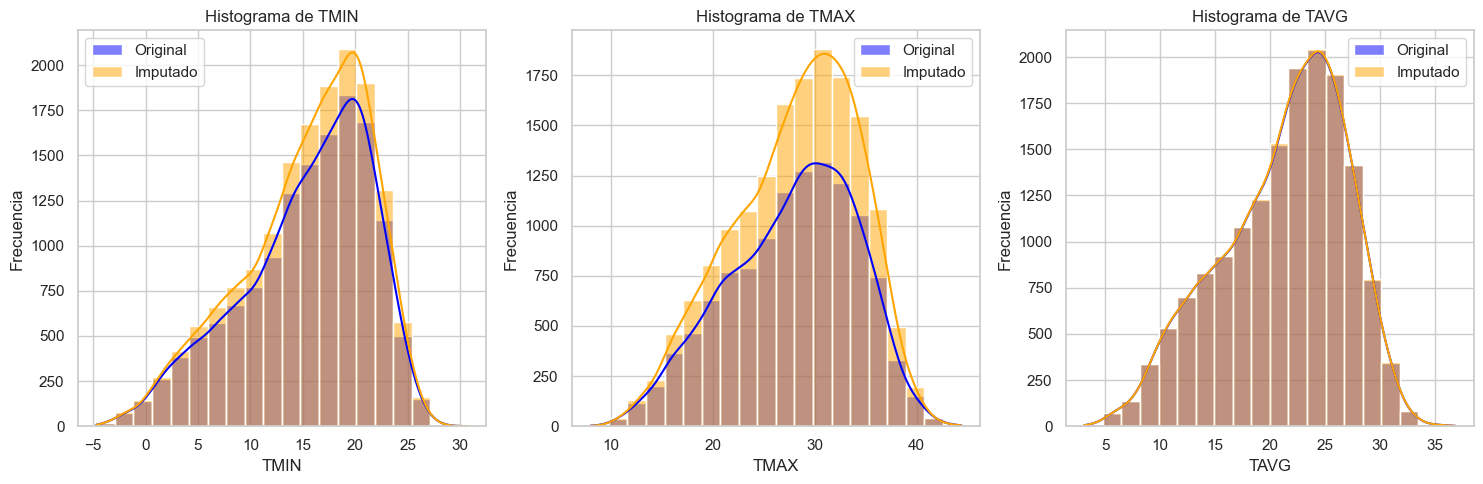

In [31]:

df= pd.read_csv(filepath_or_buffer='estaciones_meteorol.csv', sep=',')
df_resistencia_completo= df[df['NAME']=='RESISTENCIA AERO, AR' ].copy()
df_resistencia=df_resistencia_completo.drop(columns=['PRCP','DATE','NAME','Unnamed: 0'])

# Paso 2: Imputar los valores faltantes usando MICE
mice_imputer = IterativeImputer(estimator=SVR(),max_iter=50)
# Ajustar el imputador en el DataFrame con NaN
df_imputed = mice_imputer.fit_transform(df_resistencia)
# Convertir a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_resistencia.columns)

# Gráficos de Histogramas
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# Histograma para TMIN
plt.subplot(1, 3, 1)
sns.histplot(df_resistencia['TMIN'], bins=20, kde=True, color='blue', alpha=0.5, label='Original')
sns.histplot(df_imputed['TMIN'], bins=20, kde=True, color='orange', alpha=0.5, label='Imputado')
plt.title('Histograma de TMIN')
plt.xlabel('TMIN')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para TMAX
plt.subplot(1, 3, 2)
sns.histplot(df_resistencia['TMAX'], bins=20, kde=True, color='blue', alpha=0.5, label='Original')
sns.histplot(df_imputed['TMAX'], bins=20, kde=True, color='orange', alpha=0.5, label='Imputado')
plt.title('Histograma de TMAX')
plt.xlabel('TMAX')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para TAVG
plt.subplot(1, 3, 3)
sns.histplot(df_resistencia['TAVG'], bins=20, kde=True, color='blue', alpha=0.5, label='Original')
sns.histplot(df_imputed['TAVG'], bins=20, kde=True, color='orange', alpha=0.5, label='Imputado')
plt.title('Histograma de TAVG')
plt.xlabel('TAVG')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar los histogramas
plt.tight_layout()
plt.show()